____    
@laraball07 telegram

lpopfalushi@yandex.ru

+79859667491 Лариса Попфалуши 

# Startups operations/close predictions
_____
## Описание исследования

Разработать модель для предсказания успешности стартапа (закроется или нет)
_____
## Цель исследования
    
Разработать решение, которое позволит проанализировать данные по стратапам за 1970-2018 гг, спрогнозировать закрытие и причины, для разработки рекомендаций по критериям, влияющим на успешность стартапов. 
    
_____
## Задачи исследования
Построить модель, которая сможет предсказать закроется стартап или нет  на основе данных заказчика.
_____
### Исходные данные.
    
Датасет состоит из двух файлов: тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

kaggle_startups_train_01.csv - информация (53 000) стартапах, которые будут использоваться в качестве обучающих данных.
kaggle_startups_test_01.csv - информация (13 000) стартапах, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'status' для каждого стартапа из этого датасета.
kaggle_startups_sample_submit_01.csv - файл с примером предсказаний в правильном формате.
name - идентификатор (название) стартапа в тестовом наборе.
status - целевой признак. Для каждого стартапа предскажите категориальное значение соответствующее прогнозу ['operating', 'closed'].
Описание полей данных
name - Название стартапа
category_list - Список категорий, к которым относится стартап
funding_total_usd - Общая сумма финансирования в USD
status - Статус стартапа (закрыт или действующий)
country_code - Код страны
state_code - Код штата
region - Регион
city - Город
funding_rounds - Количество раундов финансирования
founded_at - Дата основания
first_funding_at - Дата первого раунда финансирования
last_funding_at - Дата последнего раунда финансирования
closed_at - Дата закрытия стартапа (если применимо)
lifetime - Время существования стартапа в днях

______

## Предсказание закроется стартап или нет

### Шаг 1. Загрузка данных: (#1_1-bullet)
* [1. Загрузим данные.]
* [2. Проверим, что данные в таблицах соответствуют описанию.](#1_2-bullet)
* [3. Вывод.](#1_3-bullet)

### Шаг 2. Предобработка данных: (#2_1-bullet)
* [1. Предообработка выборки train.]
* [2. Предообработка выборки test.](#2_2-bullet)
* [3. Вывод.](#2_3-bullet)

### Шаг 3. Исследовательский анализ данных (#3_1-bullet)
* [1. Проведение статистического анализа всех признаков и таблиц.]
* [2. Вывод.](#3_2-bullet)

### Шаг 4. Подготовка данных (#4_1-bullet)
* [1. Пайплайн с шагом предобработки данных.]

### Шаг 5. Обучение моделей (#5_1-bullet)
* [1. Поиск гиперпараметров моделей с помощью GridSearchCV]
* [2. Pipelines+Optuna+GBDT.](#5_2-bullet)
* [3. Вывод.](#5_3-bullet)

### Шаг 6. Оформление выводов
* [1. Выводы о том, какая модель справилась лучше и почему.](#6_1-bullet)

## Составление портета успешного стартапа
### Анализ признаков:
* [1. Загрузим данные.](#1_1-bullet)
* [2. Проверим, что данные в таблицах соответствуют описанию.](#1_2-bullet)
* [3. Вывод.](#1_3-bullet)

### Шаг 7. Выводы
* [1. Промежуточный выводы о том, какая модель справилась лучше и почему.](#7_1-bullet)

### Шаг 9. Общий вывод
* [1. опишем задачу; опишем исходные данные и проведённую предобработку; напишем, что сделали для поиска лучшей модели; укажем лучшую модель; добавим выводы и дополнительные предложения для бизнеса.](#9_1-bullet)

## Исследование

## Предсказание закрытия стартапа

### Шаг 1. Загрузка данных:<a id='#1_1-bullet'></a>

In [77]:
# Датасеты
import pandas as pd
from scipy import stats

from scipy import stats as st
#from scipy.stats import ttest_ind

from collections import Counter


# для создания двойного пути к базе данных
import os

# Математика
import numpy as np
# from math import sqrt
# import datetime as dt
# import math as mth

# Графики
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', 100)
# оставим всего три знака после запятой у чисел с плавающей точкой
pd.set_option('display.float_format', '{:.3f}'.format)
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 16),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style('darkgrid')
sns.set_palette('Accent') 
sns.set_context('notebook', rc={'legend.fontsize': 10.0})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# библиотеки для работы с дашбордами
# import sys

# доустанавливаем необходимые библиотеки
# !pip install scikit-learn==1.1.3 -q
# !pip install shap -q
# !pip install phik -q
# !pip install matplotlib==3.6.0
# !pip install seaborn -q
# !pip install pandas_profiling  -q
# !pip install optuna -q
# !pip install optuna-integration -q

#Библиотека sklearn

import sklearn 



from sklearn.model_selection import (
    # train_test_split,
    # RandomizedSearchCV,
    GridSearchCV,
    cross_val_score
)

from sklearn.metrics import (
    f1_score,
    #roc_auc_score,
    #make_scorer
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder,
    PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

import shap

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

from catboost import CatBoostClassifier, Pool

import optuna
from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna import visualization 

from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

# импорт класса дамми-модели 
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

# Version
print('sklearn', sklearn.__version__)  #> 0.9.0
print('mpl', mpl.__version__)  #> 3.6.0
print('sns', sns.__version__)  #> 0.9.0
print('shap', shap.__version__)  #> 0.9.0
print('phik', phik.__version__)  #> 3.6.0
print('optuna', optuna.__version__) 

sklearn 1.4.1.post1
mpl 3.6.0
sns 0.13.2
shap 0.45.0
phik 0.12.4
optuna 3.6.1


In [78]:
# Задаем параметры для разделения данных
RANDOM_STATE = 100
TEST_SIZE = 0.20

In [79]:
pth1 = './datasets/kaggle_startups_train_27042024.csv'
pth1_1 = '/datasets/kaggle_startups_train_27042024.csv'
pth2 = './datasets/kaggle_startups_test_27042024.csv'
pth2_1 = '/datasets/kaggle_startups_test_27042024.csv'

def loadFile(path1, path2):
    if os.path.exists(path1):
        return pd.read_csv(path1)
    elif os.path.exists(path2):
        return pd.read_csv(path2)
    else:
        print("No file exists:" ,path1, path2)

startup_train = loadFile(pth1, pth1_1)
startup_test = loadFile(pth2, pth2_1)

Проверка данных:<a id='#1_2-bullet'></a>

In [80]:
# Изучение датафрейма 'startup_train' 
def inspectDataframe(df):
    df.info()
    return df.head()
inspectDataframe(startup_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52513 non-null  object 
 1   category_list      50049 non-null  object 
 2   funding_total_usd  42445 non-null  float64
 3   status             52514 non-null  object 
 4   country_code       47013 non-null  object 
 5   state_code         45752 non-null  object 
 6   region             46156 non-null  object 
 7   city               46156 non-null  object 
 8   funding_rounds     52514 non-null  int64  
 9   founded_at         52514 non-null  object 
 10  first_funding_at   52514 non-null  object 
 11  last_funding_at    52514 non-null  object 
 12  closed_at          4915 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.000,operating,CHE,25,Zurich,Zürich,2,2009-12-31,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.000,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.000,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.000,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-09-30,2012-02-01,2012-02-01,NaN


In [81]:
inspectDataframe(startup_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   founded_at         13125 non-null  object 
 9   first_funding_at   13125 non-null  object 
 10  last_funding_at    13125 non-null  object 
 11  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.000,NIC,17,NaN,NaN,1,2008-06-01,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-25,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.000,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-06-16,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.000,USA,CA,San Diego,San Diego,4,2005-01-01,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.000,CAN,ON,Ottawa,Ottawa,1,2001-01-01,2007-05-08,2007-05-08,6209


**Вывод по загрузке данных**<a id='#1_3-bullet'></a>

Данные состоят из одного набора данных, разделенных на тренировочну и тестовую выборки:

1. startup_train: содержит 52514 записей с 13 столбцами. Данные успешно загружены
2. startup_test: содержит 13125 записей с 12 столбцами. Данные успешно загружены

Все данные в таблицах соответствуют описанию и готовы к дальнейшему анализу.


### Шаг 2. Предобработка данных: <a id='#2_1-bullet'></a>

In [82]:
 def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print('Информация общая: ')
    df.info()
    print('---------------------------------------------------------------------------------------------------------')
    print('Статистики: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print('Пропущенные значения: ')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Дублированные данные: ')
    print(df.duplicated().sum())

**Предообработка выборки train**: <a id='#2_1-bullet'></a>

In [83]:
# Изучение датафрейма 'train_job_satisfaction_rate'
df_review(startup_train)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.000,operating,CHE,25,Zurich,Zürich,2,2009-12-31,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.000,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.000,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.000,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-09-30,2012-02-01,2012-02-01,NaN


---------------------------------------------------------------------------------------------------------
Информация общая: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52513 non-null  object 
 1   category_list      50049 non-null  object 
 2   funding_total_usd  42445 non-null  float64
 3   status             52514 non-null  object 
 4   country_code       47013 non-null  object 
 5   state_code         45752 non-null  object 
 6   region             46156 non-null  object 
 7   city               46156 non-null  object 
 8   funding_rounds     52514 non-null  int64  
 9   founded_at         52514 non-null  object 
 10  first_funding_at   52514 non-null  object 
 11  last_funding_at    52514 non-null  object 
 12  closed_at          4915 non-null   object 
dtypes: float64(1), int64(1), object(11)
memor

,funding_total_usd,funding_rounds
count,42445.000,52514.000
mean,18248255.980,1.741
std,187121675.710,1.375
min,1.000,1.000
25%,336000.000,1.000
50%,2000000.000,1.000
75%,10000000.000,2.000
max,30079503000.000,19.000


---------------------------------------------------------------------------------------------------------
Пропущенные значения: 
name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5501
state_code            6762
region                6358
city                  6358
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64
---------------------------------------------------------------------------------------------------------
Дублированные данные: 
0


In [84]:
# изменим тип данных с 'object' на 'date'
startup_train['founded_at'] = pd.to_datetime(startup_train['founded_at'], format='%Y-%m-%d')
startup_train['first_funding_at'] = pd.to_datetime(startup_train['first_funding_at'], format='%Y-%m-%d')
startup_train['last_funding_at'] = pd.to_datetime(startup_train['last_funding_at'], format='%Y-%m-%d')
startup_train['closed_at'] = pd.to_datetime(startup_train['closed_at'], format='%Y-%m-%d')


In [85]:
# Обработка пропуска в столбце "closed_at"
startup_train['closed_at'] = startup_train['closed_at'].fillna('2018-01-01')
# Проверка 
startup_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          52514 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [86]:
# Добавим столбец lifetime
startup_train['lifetime'] = startup_train.apply(lambda x: x['closed_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['lifetime'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          52514 non-null  datetime64[ns]
 13  lifetime           52514 non-null  int64         
dtypes: dat

0    2923
1    4748
2    4383
3    5114
4    2650
Name: lifetime, dtype: int64

In [87]:
# Добавим столбец delta_invest&open_time
startup_train['delta_invest&open_time'] = startup_train.apply(lambda x: x['founded_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['delta_invest&open_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

0    -486
1   -1949
2   -2423
3   -2800
4    -489
Name: delta_invest&open_time, dtype: int64

In [88]:
# Добавим столбец delta_invest_time
startup_train['delta_funding_time'] = startup_train.apply(lambda x: x['last_funding_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['delta_funding_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

0    1310
1    1393
2     681
3    1051
4       0
Name: delta_funding_time, dtype: int64

In [89]:
startup_train['founded_year'] = startup_train['founded_at'].dt.year

startup_train['founded_year'].head()

0    2009
1    2005
2    2006
3    2004
4    2010
Name: founded_year, dtype: int32

In [90]:
# Выявление уникальных значений категориальных столбцов
for column in startup_train.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения для {column}:')
    print(startup_train[column].unique())

Уникальные значения для name:
['Lunchgate' 'EarLens' 'Reviva Pharmaceuticals' ... 'Taskforce'
 'NetScaler' 'Apparcando']
Уникальные значения для category_list:
['Online Reservations|Restaurants' 'Manufacturing|Medical|Medical Devices'
 'Biotechnology' ... 'Gambling|Games|Online Gaming|Sports'
 'Aerospace|Mobile|Transportation|Travel'
 'Online Rental|Parking|Price Comparison']
Уникальные значения для status:
['operating' 'closed']
Уникальные значения для country_code:
['CHE' 'USA' nan 'GBR' 'RUS' 'ESP' 'FRA' 'SWE' 'IND' 'KOR' 'AUS' 'TWN'
 'CHN' 'HUN' 'CAN' 'FIN' 'BRA' 'EGY' 'PRT' 'ISR' 'CHL' 'SVK' 'NLD' 'ARG'
 'ARE' 'JPN' 'IRL' 'DEU' 'LBN' 'EST' 'IDN' 'BEL' 'MEX' 'DNK' 'ITA' 'GRC'
 'ROM' 'TUR' 'SGP' 'SAU' 'MYS' 'NGA' 'QAT' 'VNM' 'BGR' 'GHA' 'UGA' 'JOR'
 'AUT' 'PAK' 'NZL' 'HKG' 'ZAF' 'LVA' 'NOR' 'HRV' 'VEN' 'PER' 'LUX' 'SVN'
 'POL' 'PHL' 'NIC' 'CZE' 'ISL' 'PAN' 'URY' 'BGD' 'MCO' 'GTM' 'THA' 'TTO'
 'UKR' 'KEN' 'CRI' 'DZA' 'LTU' 'CYM' 'MUS' 'BLR' 'SLV' 'COL' 'MLT' 'PSE'
 'BLZ' 'CYP' 'MMR' 

In [91]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_train['funding_total_usd'].apply(lambda x: abs(x - startup_train['funding_total_usd'].mean()) > 3 * startup_train['funding_total_usd'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_train['funding_total_usd'])*100


In [92]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_train['funding_rounds'].apply(lambda x: abs(x - startup_train['funding_rounds'].mean()) > 3 * startup_train['funding_rounds'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_train['funding_rounds'])*100


In [93]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_train['lifetime'].apply(lambda x: abs(x - startup_train['lifetime'].mean()) > 3 * startup_train['lifetime'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_train['lifetime'])*100


In [94]:
# # Проверка на выбросы с помощью boxplot
# for column in startup_train.select_dtypes(include=[np.number]).columns:
#     if column != 'id':
#         # Вычисление размаха данных
#         data_range = startup_train[column].max() - startup_train[column].min()
#         # data_range / train_job_satisfaction_rate[column].std())
#         # Настройка размера графика в зависимости от размаха данных
#         plt.figure(figsize=(5, data_range / startup_train[column].std()))
#         startup_train.boxplot([column])
#         plt.title(f'Boxplot для {column}')
#         plt.show()

In [95]:



startup_train['new_category'] = ''

def most_common_category(category_list):
    categories = category_list.split('|')
    return Counter(categories).most_common(1)[0][0]

startup_train['new_category'] = (startup_train['category_list'].astype(str)
                                 .apply(lambda x: x if '|' not in x else most_common_category(x)))

print(startup_train)

                         name                           category_list  \
0                   Lunchgate         Online Reservations|Restaurants   
1                     EarLens   Manufacturing|Medical|Medical Devices   
2      Reviva Pharmaceuticals                           Biotechnology   
3        Sancilio and Company                             Health Care   
4         WireTough Cylinders                           Manufacturing   
...                       ...                                     ...   
52509             Videostream                           Entertainment   
52510             Hello Curry                             Hospitality   
52511               Taskforce   Email|Messaging|Productivity Software   
52512               NetScaler                                Security   
52513              Apparcando  Online Rental|Parking|Price Comparison   

       funding_total_usd     status country_code state_code       region  \
0             828626.000  operating          CH

In [96]:
startup_train['category_list'].value_counts().sort_values(ascending = False).head(21)

category_list
Software               3207
Biotechnology          2905
E-Commerce             1063
Mobile                  920
Clean Technology        892
Curated Web             851
Health Care             744
Hardware + Software     733
Games                   681
Enterprise Software     671
Health and Wellness     613
Manufacturing           604
Advertising             554
Education               422
Semiconductors          400
Finance                 338
Real Estate             338
Consulting              330
Social Media            326
Security                317
Hospitality             278
Name: count, dtype: int64

In [97]:
startup_train['new_category'].value_counts().sort_values(ascending = False).head(21)

new_category
Biotechnology          3592
Software               3322
nan                    2465
E-Commerce             2172
Advertising            1925
Curated Web            1746
Mobile                 1396
Analytics              1314
Apps                   1184
Health Care            1134
Enterprise Software    1110
Clean Technology       1106
Games                  1014
Health and Wellness     956
Hardware + Software     876
Finance                 873
Education               800
Manufacturing           688
Consulting              566
Internet                505
Cloud Computing         495
Name: count, dtype: int64

In [98]:
startup_train['country_code'] = startup_train['country_code'].fillna('unknown')


In [99]:
# # for t in df[by_column].unique():
# #     df.loc[(df[by_column] == t) & (df[column].isna()), column] = \
# #     df.loc[(df[by_column] == t), column].median()

# # Функция для замены пропущенных значений
# def fill_missing_values(dataframe, column, by_column, reference_dict):
#     # Заменяем пропущенные значения на наиболее часто встречающееся значение
#     for key, value in reference_dict.items():
#         dataframe.loc[dataframe[by_column].isna() & (dataframe[by_column].notnull()), column] = value


# # Создаем словари для хранения наиболее часто встречающихся значений
# most_frequent_cities = {}
# most_frequent_regions = {}
# most_frequent_state_codes = {}

# # Считаем количество уникальных country_code
# unique_countries = startup_train['country_code'].unique()
# for country in unique_countries:
#     # Фильтруем датафрейм по country_code
#     filtered_data = startup_train[startup_train['country_code'] == country]
#         # Считаем наиболее часто встречающиеся значения для каждого столбца
#     if filtered_data['city'].size > 0:  # Проверяем, что в столбце 'city' есть значения
#         most_frequent_city = filtered_data['city'].mode()[0]
#     else:
#         most_frequent_city = 'unknown'  # Если нет, используем 'unknown'
    
#     if filtered_data['region'].size > 0:  # Проверяем, что в столбце 'region' есть значения
#         most_frequent_region = filtered_data['region'].mode()[0]
#     else:
#         most_frequent_region = 'unknown'  # Если нет, используем 'unknown'
    
#     if filtered_data['state_code'].size > 0:  # Проверяем, что в столбце 'state_code' есть значения
#         most_frequent_state_code = filtered_data['state_code'].mode()[0]
#     else:
#         most_frequent_state_code = 'unknown' 
    
#     # Добавляем значения в соответствующие словари
#     most_frequent_cities[country] = most_frequent_city
#     most_frequent_regions[country] = most_frequent_region
#     most_frequent_state_codes[country] = most_frequent_state_code
#     # Добавляем 'unknown' в справочники
#     most_frequent_cities['unknown'] = 'unknown'
#     most_frequent_regions['unknown'] = 'unknown'
#     most_frequent_state_codes['unknown'] = 'unknown'


# # Заменяем пропущенные значения в столбце state_code
# fill_missing_values(startup_train, 'state_code', 'country_code', most_frequent_state_codes)

# # Заменяем пропущенные значения в столбце region
# fill_missing_values(startup_train, 'region', 'country_code', most_frequent_regions)

# # Заменяем пропущенные значения в столбце city
# fill_missing_values(startup_train, 'city', 'country_code', most_frequent_cities)

# # Выводим количество замененных строк
# print(startup_train.shape[0])

In [100]:
# from collections import Counter


# # Функция для замены пропущенных значений
# def replace_missing_values(df):
#     # Создаем словарь для хранения частоты встречаемости значений в столбце 'country_code'
#     frequency_dict = Counter(df['country_code'])
    
#     # Заменяем пропущенные значения в столбце 'city'
#     df['city'] = df['city'].fillna(df['country_code'].map(frequency_dict).fillna(value=''))
    
#     # Проверяем наличие пропущенных значений в столбцах 'region' и 'state_code'
#     if df['region'].isna().any() and df['state_code'].isna().any():
#         # Если в столбце 'country_code' есть пропущенные значения, пропускаем их
#         df = df[~df['country_code'].isna()]
    
#     return df

# # Применяем функцию к DataFrame
# result_df = replace_missing_values(startup_train)

# # Выводим количество замененных значений
# print(result_df['city'].isna().sum())

In [101]:
#category_10 = startup_train['category_list'].value_counts().head(16)

# category_200 = startup_train['category_list'].value_counts()[startup_train['category_list'].value_counts() > 10].sort_values(ascending = False).index.values
# #len(category_200)

# for column in category_200:
#     if startup_train['category_list'] == column:
#         startup_train['short_category'] = startup_train.apply(column)
#     else:
#         startup_train['short_category'] = startup_train.apply('generic')

# startup_train['short_category'].head()
# # category_10_pivot = startup_train.query('category_list in @category_10.index').pivot_table(index='category_list', values='price_one_square_meter').sort_values(by='price_one_square_meter', ascending=False)
# # loc_10_pivot

# def short_category(row):
#     category = row['age']
#     unemployed = row['unemployed']

#     if age <= 18:
#         return 'дети'

#     if age <= 64:
#         if unemployed == 1:
#             return 'безработные'

#         return 'занятые'

#     return 'пенсионеры'

# clients['age_group'] = clients.apply(age_group_unemployed, axis=1)
# print(clients.head(10)) 

**Вывод по таблице startup_train:**
- привели стобцы с датой к типу Дата
- добавили 2 столбца: lifetime и delta_funding_time
- заполним пропуски в двух столбцах: name, category_list, funding_total_usd, state_code, country_code, region, city - модой/медианой,  в пайплайне
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%

**Предообработка выборки test:**<a id='#2_2-bullet'></a>

In [102]:
# Изучение датафрейма 'startup_test'
df_review(startup_test)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.000,NIC,17,NaN,NaN,1,2008-06-01,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-25,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.000,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-06-16,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.000,USA,CA,San Diego,San Diego,4,2005-01-01,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.000,CAN,ON,Ottawa,Ottawa,1,2001-01-01,2007-05-08,2007-05-08,6209


---------------------------------------------------------------------------------------------------------
Информация общая: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   founded_at         13125 non-null  object 
 9   first_funding_at   13125 non-null  object 
 10  last_funding_at    13125 non-null  object 
 11  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB
--------------------------------

,funding_total_usd,funding_rounds,lifetime
count,10547.000,13125.000,13125.000
mean,16549102.695,1.714,3098.206
std,92172825.632,1.319,2128.489
min,1.000,1.000,79.000
25%,320000.000,1.000,1729.000
50%,2000000.000,1.000,2526.000
75%,10000000.000,2.000,3871.000
max,4715000000.000,15.000,17167.000


---------------------------------------------------------------------------------------------------------
Пропущенные значения: 
name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
founded_at              0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64
---------------------------------------------------------------------------------------------------------
Дублированные данные: 
0


In [103]:
# изменим тип данных с 'object' на 'date'
startup_test['founded_at'] = pd.to_datetime(startup_test['founded_at'], format='%Y-%m-%d')
startup_test['first_funding_at'] = pd.to_datetime(startup_test['first_funding_at'], format='%Y-%m-%d')
startup_test['last_funding_at'] = pd.to_datetime(startup_test['last_funding_at'], format='%Y-%m-%d')

In [104]:
# Добавим столбец delta_invest&open_time
startup_test['delta_invest&open_time'] = startup_test.apply(lambda x: x['founded_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_test.info()
startup_test['delta_invest&open_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    13125 non-null  object        
 1   category_list           12534 non-null  object        
 2   funding_total_usd       10547 non-null  float64       
 3   country_code            11743 non-null  object        
 4   state_code              11430 non-null  object        
 5   region                  11536 non-null  object        
 6   city                    11538 non-null  object        
 7   funding_rounds          13125 non-null  int64         
 8   founded_at              13125 non-null  datetime64[ns]
 9   first_funding_at        13125 non-null  datetime64[ns]
 10  last_funding_at         13125 non-null  datetime64[ns]
 11  lifetime                13125 non-null  int64         
 12  delta_invest&open_time  13125 non-null  int64 

0    -395
1      -3
2      32
3       0
4   -2318
Name: delta_invest&open_time, dtype: int64

In [105]:
# Добавим столбец delta_invest_time
startup_test['delta_funding_time'] = startup_test.apply(lambda x: x['last_funding_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_test.info()
startup_test['delta_funding_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    13125 non-null  object        
 1   category_list           12534 non-null  object        
 2   funding_total_usd       10547 non-null  float64       
 3   country_code            11743 non-null  object        
 4   state_code              11430 non-null  object        
 5   region                  11536 non-null  object        
 6   city                    11538 non-null  object        
 7   funding_rounds          13125 non-null  int64         
 8   founded_at              13125 non-null  datetime64[ns]
 9   first_funding_at        13125 non-null  datetime64[ns]
 10  last_funding_at         13125 non-null  datetime64[ns]
 11  lifetime                13125 non-null  int64         
 12  delta_invest&open_time  13125 non-null  int64 

0       0
1       0
2     126
3    1935
4       0
Name: delta_funding_time, dtype: int64

In [106]:
startup_test['founded_year'] = startup_test['founded_at'].dt.year

startup_test['founded_year'].head()

0    2008
1    2010
2    2014
3    2005
4    2001
Name: founded_year, dtype: int32

In [107]:



startup_test['new_category'] = ''

def most_common_category(category_list):
    categories = category_list.split('|')
    return Counter(categories).most_common(1)[0][0]

startup_test['new_category'] = (startup_test['category_list'].astype(str)
                                 .apply(lambda x: x if '|' not in x else most_common_category(x)))

print(startup_test)

                         name  \
0                  Crystalsol   
1            JBI Fish & Wings   
2                    COINPLUS   
3      Imagine Communications   
4                       DNA13   
...                       ...   
13120                   Jymob   
13121               GlobaTrek   
13122                Inkd.com   
13123                  AdWill   
13124             RingCentral   

                                           category_list  funding_total_usd  \
0                                       Clean Technology        2819200.000   
1                                            Hospitality                NaN   
2                                                Finance         428257.000   
3                         Software|Video|Video Streaming       34700000.000   
4                                               Software        4530000.000   
...                                                  ...                ...   
13120                                         Recr

In [108]:
startup_test['category_list'].value_counts().sort_values(ascending = False).head(21)

category_list
Software               775
Biotechnology          693
E-Commerce             263
Mobile                 255
Clean Technology       234
Curated Web            191
Hardware + Software    181
Games                  180
Health Care            176
Enterprise Software    169
Manufacturing          157
Health and Wellness    148
Advertising            141
Finance                106
Education              101
Semiconductors          96
Security                87
Consulting              87
Real Estate             83
Web Hosting             80
Social Media            79
Name: count, dtype: int64

In [109]:
startup_test['new_category'].value_counts().sort_values(ascending = False).head(21)

new_category
Biotechnology          855
Software               809
nan                    591
E-Commerce             566
Advertising            456
Curated Web            436
Mobile                 374
Analytics              317
Clean Technology       299
Apps                   290
Health Care            282
Games                  265
Enterprise Software    248
Health and Wellness    244
Finance                234
Hardware + Software    219
Education              190
Manufacturing          183
Consulting             145
Android                138
Internet               125
Name: count, dtype: int64

In [110]:
# Выявление уникальных значений категориальных столбцов
for column in startup_test.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения для {column}:')
    print(startup_test[column].unique())

Уникальные значения для name:
['Crystalsol' 'JBI Fish & Wings' 'COINPLUS' ... 'Inkd.com' 'AdWill'
 'RingCentral']
Уникальные значения для category_list:
['Clean Technology' 'Hospitality' 'Finance' ...
 'Design|E-Commerce|Marketplaces|Printing'
 'Advertising Exchanges|Mobile|Mobile Advertising'
 'Communications Hardware|Messaging|Mobile|Office Space|Technology|VoIP']
Уникальные значения для country_code:
['NIC' 'USA' 'LUX' 'CAN' nan 'MYS' 'DEU' 'GBR' 'FRA' 'ITA' 'CHN' 'ARG'
 'NLD' 'IRL' 'AUS' 'CHE' 'CHL' 'ESP' 'IND' 'ISR' 'DNK' 'KOR' 'RUS' 'PHL'
 'URY' 'SGP' 'BRA' 'EGY' 'MEX' 'POL' 'VNM' 'AUT' 'EST' 'BEL' 'DMA' 'PRT'
 'SWE' 'JOR' 'HUN' 'HKG' 'JPN' 'ZAF' 'COL' 'BGR' 'CZE' 'GRC' 'LTU' 'TWN'
 'ISL' 'IDN' 'FIN' 'NOR' 'ARE' 'UKR' 'KEN' 'NGA' 'TUR' 'CRI' 'THA' 'CYP'
 'ROM' 'MMR' 'VEN' 'BHR' 'NZL' 'SVK' 'CYM' 'LVA' 'MKD' 'PER' 'AZE' 'BWA'
 'BGD' 'ZWE' 'CIV' 'LKA' 'SVN' 'SRB' 'BLR' 'TAN' 'SAU' 'GHA' 'CMR' 'TTO'
 'PAK' 'BMU' 'PSE' 'UGA' 'MUS' 'JAM' 'LBN' 'ECU' 'PAN' 'GTM' 'HRV' 'BRB'
 'ZMB']
Уни

In [111]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_test['funding_total_usd'].apply(lambda x: abs(x - startup_test['funding_total_usd'].mean()) > 3 * startup_test['funding_total_usd'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_test['funding_total_usd'])*100


In [112]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_test['funding_rounds'].apply(lambda x: abs(x - startup_test['funding_rounds'].mean()) > 3 * startup_test['funding_rounds'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_test['funding_rounds'])*100


In [113]:
# # Считать количество выбросов в столбце 'column_name'
# outliers = startup_test['lifetime'].apply(lambda x: abs(x - startup_test['lifetime'].mean()) > 3 * startup_test['lifetime'].std())

# # Вывести количество выбросов
# outliers.sum()/len(startup_test['lifetime'])*100


In [114]:
# # Проверка на выбросы с помощью boxplot
# for column in startup_test.select_dtypes(include=[np.number]).columns:
#     if column != 'id':
#         # Вычисление размаха данных
#         data_range = startup_test[column].max() - startup_test[column].min()
        
#         # Настройка размера графика в зависимости от размаха данных
#         plt.figure(figsize=(5, data_range / startup_test[column].std()))
#         startup_test.boxplot([column])
#         plt.title(f'Boxplot для {column}')
#         plt.show()

In [115]:
df_review(startup_test)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime,delta_invest&open_time,delta_funding_time,founded_year,new_category
0,Crystalsol,Clean Technology,2819200.000,NIC,17,NaN,NaN,1,2008-06-01,2009-07-01,2009-07-01,3501,-395,0,2008,Clean Technology
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-25,2010-07-28,2010-07-28,2717,-3,0,2010,Hospitality
2,COINPLUS,Finance,428257.000,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-06-16,2014-05-15,2014-09-18,1295,32,126,2014,Finance
3,Imagine Communications,Software|Video|Video Streaming,34700000.000,USA,CA,San Diego,San Diego,4,2005-01-01,2005-01-01,2010-04-20,4748,0,1935,2005,Software
4,DNA13,Software,4530000.000,CAN,ON,Ottawa,Ottawa,1,2001-01-01,2007-05-08,2007-05-08,6209,-2318,0,2001,Software


---------------------------------------------------------------------------------------------------------
Информация общая: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    13125 non-null  object        
 1   category_list           12534 non-null  object        
 2   funding_total_usd       10547 non-null  float64       
 3   country_code            11743 non-null  object        
 4   state_code              11430 non-null  object        
 5   region                  11536 non-null  object        
 6   city                    11538 non-null  object        
 7   funding_rounds          13125 non-null  int64         
 8   founded_at              13125 non-null  datetime64[ns]
 9   first_funding_at        13125 non-null  datetime64[ns]
 10  last_funding_at         13125 non-null  d

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime,delta_invest&open_time,delta_funding_time,founded_year
count,10547.000,13125.000,13125,13125,13125,13125.000,13125.000,13125.000,13125.000
mean,16549102.695,1.714,2008-12-10 20:55:47.382856960,2011-07-23 20:54:08.640000,2012-06-16 05:03:41.348571392,3098.206,-954.999,328.340,2008.660
min,1.000,1.000,1971-01-01 00:00:00,1973-04-15 00:00:00,1973-04-15 00:00:00,79.000,-15889.000,0.000,1971.000
25%,320000.000,1.000,2007-01-01 00:00:00,2009-11-16 00:00:00,2011-01-10 00:00:00,1729.000,-943.000,0.000,2007.000
50%,2000000.000,1.000,2010-10-21 00:00:00,2012-08-01 00:00:00,2013-08-21 00:00:00,2526.000,-470.000,0.000,2010.000
75%,10000000.000,2.000,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-11 00:00:00,3871.000,-211.000,391.000,2013.000
max,4715000000.000,15.000,2015-11-17 00:00:00,2015-12-03 00:00:00,2015-12-12 00:00:00,17167.000,3661.000,7038.000,2015.000
std,92172825.632,1.319,NaN,NaN,NaN,2128.489,1617.791,658.073,5.715


---------------------------------------------------------------------------------------------------------
Пропущенные значения: 
name                         0
category_list              591
funding_total_usd         2578
country_code              1382
state_code                1695
region                    1589
city                      1587
funding_rounds               0
founded_at                   0
first_funding_at             0
last_funding_at              0
lifetime                     0
delta_invest&open_time       0
delta_funding_time           0
founded_year                 0
new_category                 0
dtype: int64
---------------------------------------------------------------------------------------------------------
Дублированные данные: 
0


**Вывод по таблице startup_test:**
- привели стобцы с датой к типу Дата
- добавили 2 столбца: lifetime и delta_funding_time
- заполним пропуски в двух столбцах: name, category_list, funding_total_usd, state_code, country_code, region, city - модой/медианой,  в пайплайне
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%

**Вывод по предобработке данных** <a id='#2_3-bullet'></a>

Данные состоят из одного набора данных, разделенных на тренировочну и тестовую, тестовая не содержит целевого признака status

1. startup_train: содержит 52514 записей с 14 столбцами. Пропущенные значения имеются, в ходе обработки в пайплайне будут заменены на медианные значения. Добавили новый столбец lifetime, пропущенные значения в поле closed_at заменили на дату выгрузки для дальнейшего формирования столбца lifetime
2. startup_train: содержит 13125 записей с 13 столбцами. Пропущенные значения имеются, в ходе обработки в пайплайне будут заменены на медианные значения. 

Все наборы данных имеют столбец 'name', который будет являться идентификатором

- привели стобцы с датой к типу Дата
- добавили 2 столбца: lifetime и delta_funding_time
- заполним пропуски в двух столбцах: name, category_list, funding_total_usd, state_code, country_code, region, city - модой/медианой,  в пайплайне в дальнейшем
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%


### Шаг 3. Исследовательский анализ данных  <a id='#3_1-bullet'></a>

**Целью проекта является построение модели, которая сможет предсказать закроется стратап или нет. Построим графики зависимостей по критериям, которые могут выявить закономерности по оставшимся признакам**

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>  Анализ категориальных/дискретных признаков нужно сделать с помощью относительных величин - оперировать абсолютными величинами не всегда удобно, так как в зависимости от масштаба исследования (компания на 100 человек и компания на 100 000 человек, например) результаты могут быть более или менее интерпретируемыми. Для категориальных/дискретных признаков мы можем использовать `value_counts(normalize=True)`, для непрерывных можно посчитать и сравнить средние.

In [116]:
# num_columns = startup_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# columns = [col for col in num_columns]
# sns_plot = sns.pairplot(startup_train[columns])

In [117]:
# # Удаление столбца 'id'
# data_without_name = startup_train.drop('name', axis=1)

# # создаём список с наименованиями непрерывных признаков
# interval_cols = ['funding_total_usd', 'lifetime', 'delta_funding_time']

# # Вычисление матрицы корреляции Phi_K для данных без 'id'
# phik_matrix = startup_train.phik_matrix(interval_cols=interval_cols)

# # Визуализация матрицы корреляции Phi_K
# plt.figure(figsize=(15, 10))
# sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Матрица корреляции Phi_K")
# plt.show()

In [118]:
# # Определение столбца и категорий для анализа
# column = 'status'
# categories = ['operating', 'closed']
# num_columns = startup_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Получение списка всех столбцов в датафрейме
# columns = [col for col in num_columns]

# # Цикл по каждому столбцу для создания гистограммы и таблицы
# for col in columns:
#     plt.figure(figsize=(10, 6))
#     # Цикл по каждой категории для создания гистограммы
#     for category in categories:
#         # Фильтрация данных по текущей категории
#         data = startup_train[startup_train[column] == category]
#         # Создание гистограммы для текущей категории
#         sns.kdeplot(x=col, hue='status', data=startup_train, shade=True)
    
#     # Настройка и отображение гистограммы
#     plt.title(f'Гистограмма для {col}')
#     plt.xlabel(col)
#     plt.ylabel('Частота')
#     plt.legend(loc='upper right')
#     plt.show()
    
#     # Вывод таблицы для каждого столбца
#     print(f'Таблица для {col}:')
#     for category in categories:
#         # Фильтрация данных по текущей категории
#         data = startup_train[startup_train[column] == category]
#         print(f'\nКатегория: {category}')
#         # Создание и вывод таблицы с описательной статистикой для текущей категории
#         display(data[col].describe().to_frame().T)

In [119]:
# column = 'status'
# categories = ['operating', 'closed']

# ohe_columns = startup_train.select_dtypes(include=['object']).columns.tolist()

# # Получение списка всех столбцов в датафрейме, исключая 'id'
# columns = [col for col in ohe_columns if col != 'name' and col != 'status']

# # Цикл по каждому столбцу для создания гистограммы и таблицы

# for col in columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(x=col, hue=column, data=startup_train, stat='density', common_norm=False)
    
#     # Настройка и отображение гистограммы
#     plt.title(f'Гистограмма для {col}')
#     plt.xlabel(col)
#     plt.ylabel('Частота')
#     plt.legend(loc='upper right')
#     plt.show()
    
#     # Вывод таблицы для каждого столбца
#     print(f'Таблица для {col}:')
#     for category in categories:
#         # Фильтрация данных по текущей категории
#         data = startup_train[startup_train[column] == category]
#         print(f'\nКатегория: {category}')
#         # Создание и вывод таблицы с описательной статистикой для текущей категории
#         display(data[col].describe().to_frame().T)

In [120]:
# _, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# sns.boxplot(x='funding_rounds', y='status', data=startup_train, ax=axes[0]); 
# sns.violinplot(x='funding_total_usd', y='status', data=startup_train, ax=axes[1]);
# sns.violinplot(x='lifetime', y='status', data=startup_train, ax=axes[1]);
# sns.violinplot(x='delta_funding_time', y='status', data=startup_train, ax=axes[1]);


In [121]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по числу раундов инвестиций')
# sns.kdeplot(data=startup_train, x='funding_rounds', hue="status", shade=True);

In [122]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по объему инвестиций')
# sns.kdeplot(data=startup_train, x='funding_total_usd', hue="status", shade=True);

In [123]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по времени жизни')
# sns.kdeplot(data=startup_train, x='lifetime', hue="status", shade=True);

In [124]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по времени жизни')
# sns.kdeplot(data=startup_train, x='delta_funding_time', hue="status", shade=True);

In [125]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний')
# sns.countplot(data=startup_train, x='category_list', hue="status");

In [126]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний')
# sns.countplot(data=startup_train, x='category_list', hue="status");

In [127]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='country_code', hue="status");

In [128]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='state_code', hue="status");

In [129]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='region', hue="status");

In [130]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='city', hue="status");

**Вывод:** <a id='#3_1-bullet'></a>

startup_train: Этот набор данных содержит 4000 записей.
Статистики: 
- 'employment_years' медиана составляет примерно 3,7; стандартное отклонение большое, что говорит о большой дисперсии, минимальное значение - 1, максимальное - 10
- 'supervisor_evaluation' медиана составляет примерно 3,5; стандартное отклонение - 1, минимальное значение - 1, максимальное - 5
- 'salary'  медиана составляет примерно 34000; стандартное отклонение - 14900, минимальное значение - 12000, максимальное - 98400
- 'job_satisfaction_rate'  медиана составляет примерно 0,53; стандартное отклонение - 0,22, минимальное значение - 0,03, максимальное - 1

Признаки с высокой корреляцией на целевой job_satisfaction_rate:
- supervisor_evaluation
- last_year_violations

Средняя корреляция:
- employment_years

На границе 0,5 признака 'job_satisfaction_rate' можно выделить категорию сотрудников не сильно перформящих по мнению руководителей и имеющих негативное отношение к компании:

- dept диаграмма показывает равное соотношение лояльных и нелояльных по департаментам
- level больше нелояльных на позиции сеньоров Заказчику стоит задуматься, возможно, по причине усталости от проекта или слишком много знают о компании
- workload инсайтов не обнаружено
- last_year_promo стоит указать что в целом сотрудников, которых повышали в прошлом году не так много, можно подумать о пересмотре зарплат или мотивации бонусами, но и среди тех кого повышали есть сотрудники, которые не довольны работой, возможно, это ключевые сотрудники, которые долго проработали в компании
- last_year_violations много нелояльных из тех кто нарушал дисциплину, что логично, ведь они "обижены на компанию". хорошо бы с ними провести глубинные интервью для выявления причин такого поведения и отношения
- доля нелояльных примерно 45%, что много. Заказчику необходимо серьезно задуматься о поднятии морального духа сотрудников и поработать с причинами таких показателей.

Самые низкие зарплаты в департаменте продаж  на позиции джуны. Необходимо подумать об удержании таких сотрудников и составлении для них программы развития как по уровню hard/soft-skills так и зарплаты.


**Вывод**

Мы рассмотрели взаимосвязь признака уволился или нет в разрезе входных признаков и можем составить портрет "уволившегося сотрудника":
- стаж работы 1-3 лет
- ценка качества работы сотрудника, которую дал руководитель пик 3, и интересно что с 4 больше чем с 2, что может говорить о том, что сотрудник уходит не потому что он не компетентен, а возможно потому что его перекупают другие компании
- зарплата до 40 тыс с пиком в 15 тыс и в 20 тыс, что говорит об утечке джунов, возможно, которых не повысили до мидлов
- больше всего уволившихся в департаменте продаж, судя по пред исследовательскому анализу данных, у них же медиана зп ниже, на втором мисте идет ИТ-департамент
- по должности это уровень джун, на втором месте миддл
- больше всего с загрузкой низвкой и средней, говорит о том что чаще всего кандидаты уходят из-за невозможности вырасти по hard-skills и как следствие не вырасти по деньгам
- специалиста за последний год не повышали
- специалист чаще всего не нарушал внутренние распорядки, есть доля в ушедших кто нарушал, но это и закономерно, я бы исключила данный факт из гипотез

**Проведем исследовательский анализ для тестовой выборки**

In [131]:
# num_columns = startup_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# columns = [col for col in num_columns]
# sns_plot = sns.pairplot(startup_train[columns])

In [132]:
# # создаём список с наименованиями непрерывных признаков
# interval_cols = interval_cols

# # Вычисление матрицы корреляции Phi_K для данных без 'id'
# phik_matrix = startup_test[startup_test.columns[startup_test.columns != 'id']].phik_matrix(interval_cols=interval_cols)

# # Визуализация матрицы корреляции Phi_K
# plt.figure(figsize=(15, 10))
# sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Матрица корреляции Phi_K")
# plt.show()

In [133]:
# # Определение столбца и категорий для анализа
# num_columns = startup_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Получение списка всех столбцов в датафрейме
# columns = [col for col in num_columns]

# # Цикл по каждому столбцу для создания гистограммы и таблицы
# for col in columns:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(x=col, data=startup_test, shade=True)
    
#     # Настройка и отображение гистограммы
#     plt.title(f'Гистограмма для {col}')
#     plt.xlabel(col)
#     plt.ylabel('Частота')
#     plt.show()

In [134]:
# # Определение столбца и категорий для анализа
# ohe_columns = startup_test.select_dtypes(include=['object']).columns.tolist()

# # Получение списка всех столбцов в датафрейме
# columns = [col for col in ohe_columns if col != 'name']

# # Цикл по каждому столбцу для создания гистограммы и таблицы
# for col in columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=col, data=startup_test, shade=True)
#     #sns.histplot(x=col, hue=column, data=startup_test, stat='density', common_norm=False)
    
#     # Настройка и отображение гистограммы
#     plt.title(f'Гистограмма для {col}')
#     plt.xlabel(col)
#     plt.ylabel('Частота')
#     plt.show()

In [135]:
# _, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# sns.boxplot(x='status', y='funding_rounds', data=startup_test, ax=axes[0]); 
# sns.violinplot(x='status', y='funding_total_usd', data=startup_test, ax=axes[1]);

In [136]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по числу раундов инвестиций')
# sns.kdeplot(data=startup_train, x='funding_rounds', hue="status", shade=True);

In [137]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по объему инвестиций')
# sns.kdeplot(data=startup_train, x='funding_total_usd', hue="status", shade=True);

In [138]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по времени жизни')
# sns.kdeplot(data=startup_train, x='lifetime', hue="status", shade=True);

In [139]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по времени жизни')
# sns.kdeplot(data=startup_train, x='delta_funding_time', hue="status", shade=True);

In [140]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний')
# sns.countplot(data=startup_train, x='category_list', hue="status");

In [141]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний')
# sns.countplot(data=startup_train, x='category_list', hue="status");

In [142]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='country_code', hue="status");

In [143]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='state_code', hue="status");

In [144]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='region', hue="status");

In [145]:
# plt.figure(figsize=(12, 7))
# plt.title('Распределение компаний по странам')
# sns.countplot(data=startup_train, x='city', hue="status");

**Вывод**

Данные распределены нормально, выбросов не имеют. Инсайтов помимо тренировочной выборки не выявлено. 

 ### Шаг 4. Подготовка данных<a id='#4_1-bullet'></a>

In [146]:
train = startup_train.drop(['closed_at', 'founded_at', 'first_funding_at', 'last_funding_at', 'category_list'], axis=1)
test = startup_test.drop(['first_funding_at', 'last_funding_at', 'founded_at', 'category_list'], axis=1)
train.drop_duplicates(inplace=True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    52513 non-null  object 
 1   funding_total_usd       42445 non-null  float64
 2   status                  52514 non-null  object 
 3   country_code            52514 non-null  object 
 4   state_code              45752 non-null  object 
 5   region                  46156 non-null  object 
 6   city                    46156 non-null  object 
 7   funding_rounds          52514 non-null  int64  
 8   lifetime                52514 non-null  int64  
 9   delta_invest&open_time  52514 non-null  int64  
 10  delta_funding_time      52514 non-null  int64  
 11  founded_year            52514 non-null  int32  
 12  new_category            52514 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 5.0+ MB
<class 'pandas.core.fram

In [147]:
# загружаем данные
X_train = train.drop('status', axis=1)
X_test = test
y_train = train['status']

In [148]:
# создадим экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучим модель и трансформируем тренировочную выборку 
y_train = label_encoder.fit_transform(y_train)


In [149]:
# num_col_names = ['funding_total_usd',
#                  'funding_rounds',
#                  'lifetime', 'delta_funding_time']
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
# axes[0].set_title('Гистограмма распределения')
# X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
# axes[1].set_title('Разброс значений признаков')
# plt.show()

In [150]:
# # создаём списки с названиями признаков
# ohe_col = ['name', 'category_list', 'country_code', 'state_code', 'region', 'city']
# ord_col = ['funding_rounds']
# num_col = ['delta_funding_time', 'funding_total_usd', 'lifetime']

# # создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# # SimpleImputer + OHE
# ohe_pipe = Pipeline(
#     [
#         (
#             'simpleImputer_ohe', 
#             SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#         ),
#         (
#             'ohe', 
#             OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=False)
#         )
#     ]
# ) 

# ord_pipe = Pipeline(
#     [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#      ('ord',  OrdinalEncoder(
#                 categories=[
#                     ['1', '2', '3', '4',  '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
#                 ], 
#                 handle_unknown='use_encoded_value', unknown_value=np.nan
#             )
#         ),
#      ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='median'))
#     ]
# )

# num_pipe = Pipeline(steps=[
#     ('impute', SimpleImputer(strategy='median')),
#     ('scale',StandardScaler())
# ])

# # создайте общий пайплайн для подготовки данных
# data_preprocessor = ColumnTransformer(
#     [
#         ('ohe', ohe_pipe, ohe_col),
#         ('ord', ord_pipe, ord_col),
#         ('num', num_pipe, num_col)
#     ], 
#     remainder='passthrough'
# ) 

### Шаг 5. Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

In [151]:
startup_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            52514 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

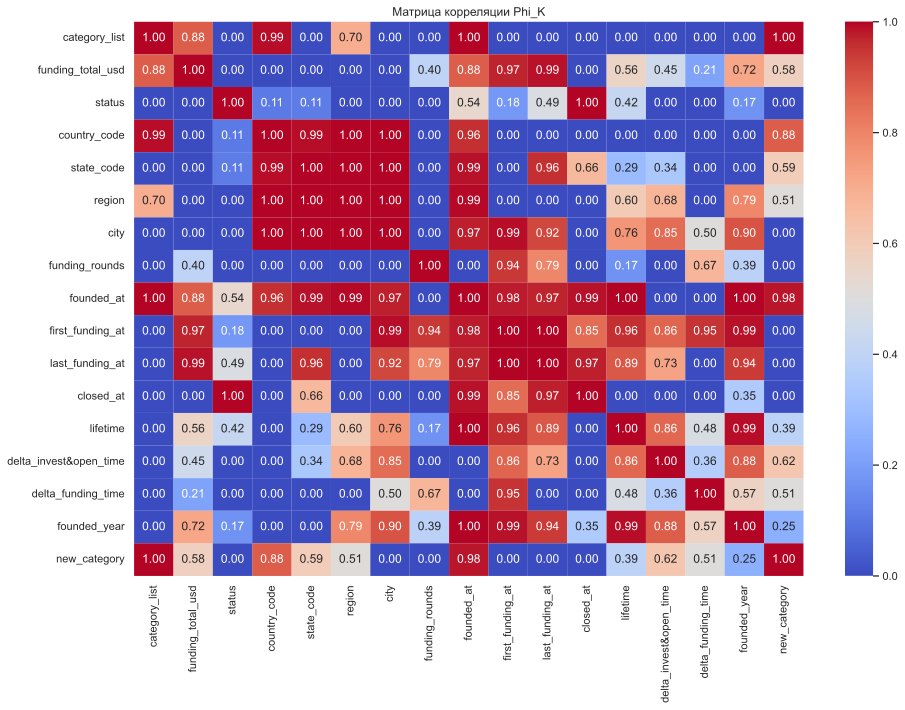

In [152]:
# Удаление столбца 'name'
data_without_id = startup_train.drop('name', axis=1)

# создаём список с наименованиями непрерывных признаков
interval_cols = ['funding_total_usd', 'lifetime', 'delta_invest&open_time', 'delta_funding_time']

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = data_without_id.sample(1000).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

### Шаг 5.  Обучение моделей  <a id='#5_1-bullet'></a>

#### Поиск гиперпараметров моделей с помощью GridSearchCV

In [153]:
# pipe_final = Pipeline([
#     ('preprocessor', data_preprocessor),
#     ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
# ])
 
# param_grid = [
#     {
#         'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
#     },

#     {
#         'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
#         'models__max_depth': range(1, 25),
#         'models__max_features': range(1, 25),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
#     },
#     {
#         'models': [KNeighborsClassifier()],
#         'models__n_neighbors': range(10, 20),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
#     }
# ]

# grid = GridSearchCV(
#     pipe_final,
#     param_grid,
#     #n_jobs=-1,
#     cv=5,
#     scoring='f1'
# )
# grid.fit(X_train, y_train)


In [154]:
# best_model = grid.best_estimator_
# print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
# print(f'Метрика F1 лучшей модели по кросс-валидации на обучающих данных: {round(grid.best_score_,4)}')

In [155]:
# test_final = test.drop(['category_list', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'lifetime', 'delta_funding_time'], axis=1)
# prediction_final = best_model.predict(X_test)
# y_test_df = pd.DataFrame(label_encoder.inverse_transform(prediction_final), columns = ['status'])
# test_final = pd.concat([test_final,y_test_df],axis=1).
# print(test_final.head())
# test_final.to_csv('startup_predict.csv', index=False)

**Вывод по обучению первой модели**
- Обучили методом RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier
- параметры лучшей модели 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8
- метрика лучшей модели на кроссвалидационной выборке - Best score: 80%. При проверке на тестовой выборки метрика составила 71,33 
Минимальный порог был преодолен, но решила улучшить показатель попробова новые модели

#### Pipelines+Optuna+CatBoostClassifier <a id='#5_2-bullet'></a>

In [157]:
# создаём списки с названиями признаков
ohe_col = ['name', 'new_category', 'country_code', 'state_code', 'region', 'city']
ord_col = ['funding_rounds']
num_col = ['delta_funding_time', 'funding_total_usd', 'lifetime', 'founded_year', 'delta_invest&open_time']

In [158]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('one-hot',OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', min_frequency=500, sparse_output=False))
])

ord_pipeline = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['1', '2', '3', '4',  '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='median'))
    ]
)

In [159]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_col),
    ('ord', ord_pipeline, ord_col),
    ('ohe_pipeline',ohe_pipeline, ohe_col)
    ],
    remainder='drop',
    n_jobs=-1)

In [192]:
#Создадим функцию для поиска гиперпараметров для модели CatBoostClassifier с помощью Optuna
def objective_cbc(trial):    
    # Список гиперпараметров для перебора (для CatBoostClassifier)
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }
    

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    
    # Определяю модель машинного обучения, которой передаются гиперпараметры , cat_features = cat_features
    estimator = CatBoostClassifier(**param, verbose = False)

    # Прикручиваю пайплайны
    clf_pipeline_cbc = Pipeline(steps=[
            ('col_trans', col_trans),
            ('model', estimator)
        ])
        
    f1_cbc = cross_val_score(clf_pipeline_cbc, X_train, y_train, cv=3, scoring= 'f1').mean()
    return f1_cbc

# Инициализирую подбора гиперпараметров.
study_cbc = optuna.create_study(direction="maximize", study_name="lpopf")
# Запускаю процесс подбора гиперпараметров
study_cbc.optimize(objective_cbc, n_trials=100)



[I 2024-06-12 16:10:15,490] A new study created in memory with name: lpopf
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2024-06-12 16:11:27,522] Trial 0 finished with value: 0.9965556168477504 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08297717919006208

In [166]:
#Выводим результаты поиска лучших гиперпараметров
print('Number of finished trials: {}'.format(len(study_cbc.trials)))
print('Best trial:')
trial_cbc = study_cbc.best_trial

print('  Value: {}'.format(trial_cbc.value))
print('  Params: ')

for key, value in trial_cbc.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.9964197778037365
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.09598716165198035
    depth: 11
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 1.5889884884534466


In [167]:
#Сохраним лучшие параметры модели в переменную
params_cbc = trial_cbc.params

In [168]:
#Визуализируем параметры которые больше всего повлияли на метрику
optuna.visualization.plot_param_importances(study_cbc)

In [172]:
#Переобучим модеь с лучшими параметрами через пайплайн
clf = CatBoostClassifier(**params_cbc, verbose = False)
clf_pipeline_best = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])
clf_pipeline_best.fit(X_train, y_train)
predictions_test = clf_pipeline_best.predict(X_test)
display(clf_pipeline_best)


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['delta_funding_time',
                                                   'funding_total_usd',
                                                   'lifetime', 'founded_year',
                                                   'delta_invest&open_time']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most...
                                                  ['funding_rounds']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=500,
                                                                                 sparse_output=False))]),
                                                  ['name', 'new_category',
                                                   'country_code', 'state_code',
                                                   'region', 'city'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x169d75490>)])

In [170]:
#Сохраним результаты предсказания в файл для загрузки на платформу Kaggle
test_final = test.drop(['new_category', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'lifetime', 'delta_funding_time', 'delta_invest&open_time', 'founded_year'], axis=1)
y_test_cbc = pd.DataFrame(label_encoder.inverse_transform(predictions_test), columns = ['status'])
test_final_cbc = pd.concat([test_final,y_test_cbc],axis=1)
print(test_final_cbc.head())
test_final_cbc.to_csv('startup_predict_cbc.csv', index=False)

                     name     status
0              Crystalsol  operating
1        JBI Fish & Wings  operating
2                COINPLUS  operating
3  Imagine Communications  operating
4                   DNA13  operating


**Вывод по обучению второй модели**

- Поиск гиперпараметров осуществлялся через Optuna: получилось быстрее чем GridSearchCV примерно в 3 раза
- Лучшие гиперпараметры:   
    - objective: CrossEntropy
    - colsample_bylevel: 0.09598716165198035
    - depth: 11
    - boosting_type: Ordered
    - bootstrap_type: Bayesian
    - bagging_temperature: 1.5889884884534466
- Лучша метрика 0.9964197778037365
- Результат работы модели на тестовой выборке 0.96470

#### Pipelines+Optuna+XGBoostClassifier <a id='#5_3-bullet'></a>

In [ ]:
def objective_xgbst(trial):    
    # Список гиперпараметров для перебора (для XGBoostClassifier)
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Определяю модель машинного обучения, которой передаются гиперпараметры
    estimator = XGBClassifier(**param, verbose=False)

    # Прикручиваю пайплайны
    clf_pipeline = Pipeline(steps=[
            ('col_trans', col_trans),
            ('model', estimator)
        ])
        
    f1_xgbst = cross_val_score(clf_pipeline, X_train, y_train, cv=3, scoring= 'f1').mean()
    return f1_xgbst

# Инициализирую подбор гиперпараметров.
study_xgbst = optuna.create_study(direction="maximize", study_name="lpopf_xgbst")
# Запускаю процесс подбора гиперпараметров
study_xgbst.optimize(objective_xgbst, n_trials=100)

In [ ]:
print('Number of finished trials: {}'.format(len(study_xgbst.trials)))
print('Best trial:')
trial_xgbst = study_xgbst.best_trial

print('  Value: {}'.format(trial_xgbst.value))
print('  Params: ')

for key, value in trial_xgbst.params.items():
    print('    {}: {}'.format(key, value))

In [ ]:
params_xgbst = trial_xgbst.params

In [ ]:
optuna.visualization.plot_param_importances(study_xgbst)

In [ ]:
xgbst = XGBClassifier(**params_xgbst)
clf_pipeline_xgbst = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', xgbst)
])
clf_pipeline_xgbst.fit(X_train, y_train)
predictions_test_xgbst = clf_pipeline_xgbst.predict(X_test)
display(clf_pipeline_xgbst)

In [ ]:
y_test_xgbst = pd.DataFrame(label_encoder.inverse_transform(predictions_test_xgbst), columns = ['status'])
test_final_xgbst = pd.concat([test_final,y_test_xgbst],axis=1)
print(test_final_xgbst.head())
test_final_xgbst.to_csv('startup_predict_xgbst.csv', index=False)

**Вывод по обучению третьей модели**
- Обучили методом XGBClassifier
- параметры лучшей модели 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8
- метрика лучшей модели на кроссвалидационной выборке - Best score: 15.252342948908971. Цель была меньше 15

#### Оценка важности признаков методом SHAP

In [177]:

X_train_p = pd.DataFrame(
    col_trans.fit_transform(X_train),
    columns=col_trans.get_feature_names_out())
print(X_train_p)

X_test_p = pd.DataFrame(
    col_trans.transform(X_test),
    columns=col_trans.get_feature_names_out()    
) 

       num_pipeline__delta_funding_time  num_pipeline__funding_total_usd  \
0                                 1.399                           -0.085   
1                                 1.520                            0.165   
2                                 0.486                            0.121   
3                                 1.023                            0.042   
4                                -0.503                           -0.078   
...                                 ...                              ...   
52509                            -0.503                           -0.078   
52510                            -0.503                           -0.087   
52511                             0.319                           -0.090   
52512                             2.282                           -0.013   
52513                            -0.503                           -0.088   

       num_pipeline__lifetime  num_pipeline__founded_year  \
0                      -0.

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [180]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=16)
# обучаем SelectKBest
selector.fit(X_train_p, y_train)

# сформируйте выборки с лучшими признаками
features_names = X_train_p.columns[selector.get_support(indices=True)]
X_train_new = X_train_p[list(features_names)]
X_test_new = X_test_p[list(features_names)]

In [182]:
cbc_shap = CatBoostClassifier(**params_cbc)
cbc_shap.fit(X_train_new, y_train)

0:	learn: 0.6388484	total: 287ms	remaining: 4m 46s
1:	learn: 0.6145864	total: 302ms	remaining: 2m 30s
2:	learn: 0.5920560	total: 317ms	remaining: 1m 45s
3:	learn: 0.5711400	total: 333ms	remaining: 1m 22s
4:	learn: 0.5517276	total: 348ms	remaining: 1m 9s
5:	learn: 0.5331467	total: 369ms	remaining: 1m 1s
6:	learn: 0.5060921	total: 404ms	remaining: 57.4s
7:	learn: 0.4803409	total: 434ms	remaining: 53.9s
8:	learn: 0.4663680	total: 456ms	remaining: 50.2s
9:	learn: 0.4536085	total: 473ms	remaining: 46.8s
10:	learn: 0.4405555	total: 494ms	remaining: 44.4s
11:	learn: 0.4287147	total: 517ms	remaining: 42.5s
12:	learn: 0.4185935	total: 534ms	remaining: 40.5s
13:	learn: 0.4076878	total: 571ms	remaining: 40.2s
14:	learn: 0.3855997	total: 613ms	remaining: 40.3s
15:	learn: 0.3776810	total: 631ms	remaining: 38.8s
16:	learn: 0.3703275	total: 653ms	remaining: 37.8s
17:	learn: 0.3566289	total: 686ms	remaining: 37.4s
18:	learn: 0.3443198	total: 715ms	remaining: 36.9s
19:	learn: 0.3382373	total: 742ms	rem

<AxesSubplot: ylabel='Feature'>

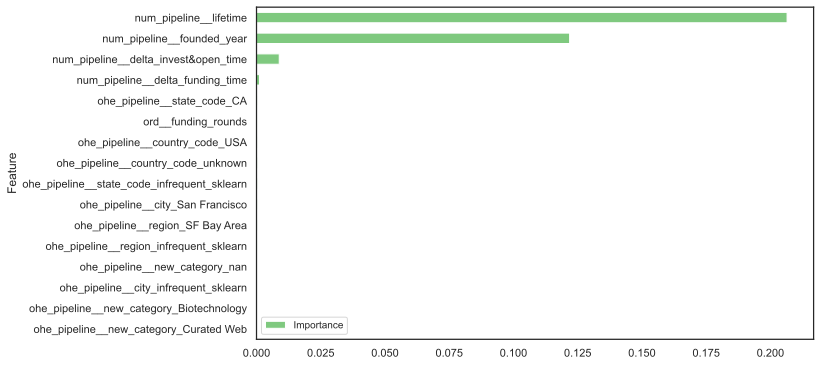

In [183]:
from sklearn.inspection import permutation_importance
def custom_f1(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

result = permutation_importance(cbc_shap, X_train_new, y_train, scoring=custom_f1)

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

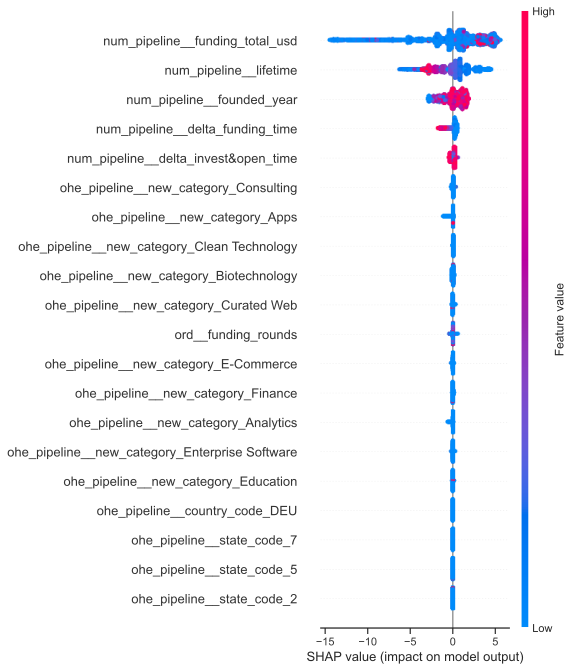

In [190]:
# построим график общей значимости признаков:
explainer = shap.TreeExplainer(cbc_shap)
# Используем встроенную функцию объяснения SHAP для получения SHAP-значений
shap_values = explainer.shap_values(X_test_p)
shap.summary_plot(shap_values, X_test_p) 

In [191]:
shap.plots.beeswarm(shap_values, max_display=300) 

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

Диаграмма shap.plots.beeswarm — это один из вариантов визуализации вклада признаков в каждое предсказание модели.

На графике точками отображены все наблюдения из выборки. На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений.

Негативные значения Шепли слева от центральной вертикальной линии означают, что признак склоняет модель отнести объекты к классу 0 (покупательская активность не снизится), а положительные справа — к классу 1 (покупательская активность снизится).

Чем толще линия по вертикали, тем больше наблюдений сгруппированы вместе: у них близкие значения Шепли. Это значит, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных.

Цвет точки отражает значения каждого признака объекта: чем краснее объект, тем больше признак, указанный на оси Y.

Признаки, влияющие на покупательскую активность:


Вывод: все признаки имеют значение для предсказания покупательской активности. Признаки с большими положительными значениями SHAP сильнее всего влияют на снижение покупательской активности, а признаки с отрицательными значениями SHAP - на сохранение покупательской активности.

Признаки “num_минут_предыдущий_месяц”, “num_Страниц_за_визит” и “num_Средний просмотр категории за визит”, являются наиболее значимыми, так как они имеют наибольшее влияние на покупательскую активность.

“ohe_Популярная категория Товары для детей” и ”num выручка текущий месяц” - менее важны для модели.

In [ ]:
# feature_names = clf_pipeline_xgbst[:-1].get_feature_names_out()

# mdi_importances = pd.Series(
#     clf_pipeline_xgbst[-1].feature_importances_, index=feature_names
# ).sort_values(ascending=True)

In [ ]:
# ax = mdi_importances.plot.barh()
# ax.set_title("Feature Importances")
# ax.figure.tight_layout()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=16)
# обучаем SelectKBest
selector.fit(X_train_p, y_train)

# сформируйте выборки с лучшими признаками
features_names = X_train_p.columns[selector.get_support(indices=True)]
X_train_new = X_train_p[list(features_names)]
X_test_new = X_test_p[list(features_names)]

In [ ]:
xgbst = XGBClassifier(**params_xgbst)
xgbst.fit(X_train_new, y_train)

In [ ]:
from sklearn.inspection import permutation_importance
def custom_f1(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

result = permutation_importance(xgbst, X_train_new, y_train, scoring=custom_f1)

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

In [ ]:
# from lime.lime_tabular import LimeTabularExplainer

# # Объяснение модели с использованием LIME
# explainer = LimeTabularExplainer(X_train, feature_names=list(range(10)), class_names=['Class1', 'Class2'], discretize='quartile')


In [ ]:
# построим график общей значимости признаков:
explainer = shap.LinearExplainer(xgbst, X_test_p)
shap_values = explainer(X_test_p)
shap.plots.bar(shap_values, max_display=17) 

Лидирует по-прежнему квадрат реализованных заказов клиента, а вторым по значимости впервые стал второй признак — количество подтверждённых заказов. x1 и раньше был самым важным из исходных признаков, но только сейчас он вошёл в тройку лучших.
Признаки на графике расположены в порядке убывания их вклада: если убрать те, что наверху, качество модели просядет сильнее всего.
Перейдём к самому интересному — посмотрим, как признаки влияют на каждое предсказание модели:

In [ ]:
shap.plots.beeswarm(shap_values, max_display=16) 

Очевидно, почему высокие значения квадрата x1 снижают вероятность отнесения заказа к классу 1. Гораздо сложнее понять, как исходный x1 повышает риски отмены заказа. Почему полиномиальный признак повышает вероятность одного события, а исходный — другого?
Чтобы объяснить такую ситуацию, уже недостаточно средств машинного обучения: остаётся только рассуждать логически. Все признаки модели как-то взаимосвязаны, поэтому и анализировать их нужно вместе. Объяснить аномалию с признаками x1 и x1^2 поможет третий по значимости признак x4^2 — квадрат количества позиций в заказе. 
Он также увеличивает вероятность отмены заказа. Много заказов за всё время и много позиций в заказе увеличивают риск отмены… Скорее всего, оба этих признака описывают поведение постоянных клиентов «Морских вкуснях» — такие берут помногу и часто. Что же может подтолкнуть их к отмене? Скорее всего, их собственные привычки! 
Очень часто постоянные клиенты стабильно берут одни и те же блюда или пользуются одинаковыми услугами. Поэтому они сразу же отменяют заказ, если случайно добавляют в него что-то лишнее, забывают про любимое блюдо или сталкиваются с отменой привычных скидок.
Также здесь может работать фактор повторения: если много заказов прошли без проблем, то вероятность ошибки и отмены растёт с каждым следующим заказом. Невозможно всё время делать верные заказы: рано или поздно клиент ошибётся, и чем больше он заказывает, тем выше риск.
Посмотрим на отдельные примеры неверно классифицированных объектов. Для этого отфильтруем такие наблюдения по двум критериям:
Истинное значение целевого признака — 1.
Вероятность принадлежность к классу 1 была оценена ниже чем 0.3.

In [ ]:
X_test_df['y_yest'] = y_test.tolist()
X_test_df['predict_proba'] = model.predict_proba(X_test_new)[:,1]

X_test_df[(X_test_df['y_yest']==1)&(X_test_df['predict_proba']<0.3)][['x1^2','x1']] 

#### Вывод по выбору лучшей модели  <a id='#5_3-bullet'></a>

- Лучшая модель вторая, проведем итоговое тестирование лучшей модели. 
- Значение метрики F1 на тестовой выборке 72%

По результатам поиска лучшей модели в первом этапе определили что модель RandomForestClassifier показывает себя лучше всего. исходя из этих данных было сделано предположение, что лучшей моделью нечувствительной к пропускам и большому кол-ву категорий в данных, являются модели основанные на градиентном бустинге.

Справка про градиентный бустинг:

В ходе обучения случайного леса каждый базовый алгоритм строится независимо от остальных. Бустинг, в свою очередь, воплощает идею последовательного построения линейной комбинации алгоритмов. Каждый следующий алгоритм старается уменьшить ошибку текущего ансамбля.

Бустинг, использующий деревья решений в качестве базовых алгоритмов, называется градиентным бустингом над решающими деревьями, Gradient Boosting on Decision Trees, GBDT. Он отлично работает на выборках с «табличными», неоднородными данными. Примером таких данных может служить описание пользователя Яндекса через его возраст, пол, среднее число поисковых запросов в день, число заказов такси и так далее. Такой бустинг способен эффективно находить нелинейные зависимости в данных различной природы. Этим свойством обладают все алгоритмы, использующие деревья решений, однако именно GBDT обычно выигрывает в подавляющем большинстве задач. Благодаря этому он широко применяется во многих конкурсах по машинному обучению и задачах из индустрии (поисковом ранжировании, рекомендательных системах, таргетировании рекламы, предсказании погоды, пункта назначения такси и многих других).



In [ ]:
#print(f'Метрика F1 лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),4)}')

In [ ]:
#**Тестирование константной модели**
# dummy_model = DummyRegressor(strategy='mean')
# dummy_model.fit(X_train, y_train)
# dummy_model_preds = dummy_model.predict(X_test)

**Обучение второй модели**

In [ ]:
parameters2 = {
    'n_neighbors': distributions.IntDistribution(1, 10)
} 

In [ ]:

# создаём списки с названиями признаков
ohe_col = ['dept', 'last_year_promo', 'last_year_violations']
ord_col = ['level', 'workload']
num_col = ['employment_years', 'supervisor_evaluation', 'salary']

num = Pipeline(steps=[
    ('ss', StandardScaler())])

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
) 

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ], 
    remainder='passthrough'
) 

X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out())
print(X_train_p)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

In [ ]:
model2 = KNeighborsRegressor()

oscv2 = OptunaSearchCV(
    model2,
    parameters2,
    scoring=scorer,
    cv=5,
    random_state=RANDOM_STATE
) 
# запускаем поиск гиперпараметров
oscv2.fit(X_train_p, y_train)

print(oscv2.best_params_)

In [ ]:
print('sMAPE', oscv2.best_score_*-1)

In [ ]:
pred_train2 = oscv2.best_estimator_.predict(X_train_p)
print('sMAPE', smape(y_train, pred_train2))

**Вывод по обучению второймодели**
- Обучили методом KNeighborsRegressor
- параметры лучшей модели {'n_neighbors': 3}
- метрика лучшей модели на кроссвалидационной выборке - Best score: 18.56. Цель была меньше 15
- метрика sMAPE на тестовой выборке - Best score: 16.03

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `DummyClassifier` - модель классификации, а не регрессии.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправила. Спасибо!*
</div>

**Анализ важности признаков**

устарело, не потребовалось

In [ ]:
# # сформируйте таблицу важности признаков
# feature_importances = pd.DataFrame(
#     {
#         'Feature': X_train_p.columns,
#         'Importance': oscv.best_estimator_.feature_importances_
#     })

# # сортируем таблицу по важности — от большей к меньшей
# print(feature_importances.sort_values('Importance', ascending=False))

Следующими действиями попробовала убрать входные признаки со степенью важности меньше 0.02, но это только ухудшило показатели модели

In [ ]:
# feature_importances[
#     feature_importances['Importance'] < 0.02
# ]['Feature'].to_list() 

In [ ]:
# features_to_drop = feature_importances[
#     feature_importances['Importance'] < 0.02
# ]['Feature'].to_list() 

In [ ]:
# X_train_less_features = X_train_p.drop(features_to_drop, axis=1)
# X_test_less_features = X_test_p.drop(features_to_drop, axis=1)

In [ ]:
# # инициализируйте модель дерева решений с лучшими гиперпараметрами
# model_less_features = DecisionTreeRegressor(
#     min_samples_split=8,
#     min_samples_leaf=3,
#     max_depth=11,
#     random_state=RANDOM_STATE)

# # обучаем модель
# model_less_features.fit(X_train_less_features, y_train)

In [ ]:
# #Метрика на первой модели
# prediction = model_less_features.predict(X_test_less_features)
# # вычисляем метрику
# print(smape(y_test, prediction))

Вывод: удаление мене важных признаков немного ухудшило предсказательную способность модели

От лишних признаков попробуем избавиться с помощью SelectKBest c методом — mutual_info_classif:

In [ ]:

# smape_list = []

# for i in range(len(X_test_p.columns)):
#     selector = SelectKBest(mutual_info_classif, k=i+1)
#     selector.fit(X_train_p, y_train)
    
#     features_names = selector.get_feature_names_out()
    
#     X_train_new = X_train_p[list(features_names)]
#     X_test_new = X_test_p[list(features_names)]

#     model = DecisionTreeRegressor(
#         min_samples_split=5,
#         min_samples_leaf=5,
#         max_depth=11,
#         random_state=RANDOM_STATE)

#     model.fit(X_train_new, y_train)

#     #Метрика на первой модели
#     prediction_kbest = model.predict(X_test_new)
#     # вычисляем метрику
#     smape_new = smape(y_test, prediction_kbest)

#     # predicts = X_test_p[['x3']].copy()
#     # predicts['tree'] = model.predict(X_test_new)
#     # predicts['y_test'] = y_test.tolist()

#     smape_list.append(smape_new)
   
#     print(i, smape_best_model, smape_new) 

Вывод: судя по результатам поиска, лучшие показатели модель выдаст на 60 признаках

In [ ]:
# #Посмотрим какие признаки необходимо нам оставить:
# selector = SelectKBest(mutual_info_classif, k=60)
# selector.fit(X_train_p, y_train)
# features_names = selector.get_feature_names_out()
# print(features_names) 

In [ ]:
# # сформируем выборки с лучшими признаками
# features_names = X_train_p.columns[selector.get_support(indices=True)]
# X_train_new = X_train_p[list(features_names)]
# X_test_new = X_test_p[list(features_names)]

# # обучите модель на лучших признаках
# best_model.fit(X_train_new, y_train)
# print(list(features_names))

In [ ]:
# #Тестирование лучшей модели
# prediction = best_model.predict(X_test_p)

# # вычисляем метрику
# smape_best_model = smape(y_test, prediction)
# print(smape_best_model)

In [ ]:
# #Метрика на первой модели
# prediction_final = best_model.predict(X_test_new)
# # вычисляем метрику
# smape_final = smape(y_test, prediction_final)
# print(smape_final)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Эксперименты с отбором признаков также стоит делать на кросс-валидации - на `test` оцениваем только один лучший эксперимент.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправила. Спасибо!*
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2.<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> См.замечание ранее по импортам.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправила. Спасибо!*
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправила. Спасибо!*
</div>

### Шаг 6. Оформление выводов <a id='#6_1-bullet'></a>

**Вывод**
Параметры лучшей модели:
- DecisionTreeRegressor(max_depth=16, max_features=11, min_samples_leaf=5, min_samples_split=14, random_state=42) 
- Метрика лучшей модели на кроссвалидационной выборке: 15.3
- Метрика лучшей модели на тестовой выборке 4,1

## Составление портрета успешного стартапа

Сформулируем гипотезу и проверим ее статистическим методом:

Нулевая гипотеза: средние значения уровня удовлетворенности сотрудников из двух групп равны.
Альтернативная гипотеза: среднее значение уровня удовлетворенности не ушедших больше, чем среднее значение уровня удовлетворенности ушедших

In [ ]:
jsr_grouped = all_target_features.groupby('quit')['job_satisfaction_rate']

jsr_quit = jsr_grouped.get_group('yes')
jsr_nonquit = jsr_grouped.get_group('no')

prev_screens_value = 0.5

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(jsr_nonquit, jsr_quit, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

**Вывод**
есть основания предположить что уровень удовлетворенности не ушедших больше, чем среднее значение уровня удовлетворенности ушедших 

In [ ]:
# создаём список с наименованиями непрерывных признаков
interval_cols = interval_cols

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = all_target_features[all_target_features.columns[all_target_features.columns !='id']].phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

**Вывод по исследовательскому анализу**

портрет "уволившегося сотрудника":
- стаж работы 1-3 лет
- оценка качества работы сотрудника, которую дал руководитель пик 3, и интересно что с 4 больше чем с 2, что может говорить о том, что сотрудник уходит не потому что он не компетентен, а возможно потому что его перекупают другие компании
- зарплата до 40 тыс с пиком в 15 тыс и в 20 тыс, что говорит об утечке джунов, возможно, которых не повысили до мидлов
- больше всего уволившихся в департаменте продаж, судя по пред исследовательскому анализу данных, у них же медиана зп ниже, на втором мисте идет ИТ-департамент
- по должности это уровень джун, на втором месте миддл
- больше всего с загрузкой низвкой и средней, говорит о том что чаще всего кандидаты уходят из-за невозможности вырасти по hard-skills и как следствие не вырасти по деньгам
- специалиста за последний год не повышали
- специалист чаще всего не нарушал внутренние распорядки, есть доля в ушедших кто нарушал, но это и закономерно, я бы исключила данный факт из гипотез

Проверили гипротезу о взаимосвязи уровня удовлетворенности сотрудника и его уходом, наблюдается корреляция по границе 0,5 уровня удовлетворенности сотрудников, все что выше - остаются, ниже - уходят


job_satisfaction_rate и quit действительно связаны и мы получили необходимое значение метрики в первой задаче.

Добавили job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи, проверили гипротезу о взаимосвязи уровня удовлетворенности сотрудника и его уходом, наблюдается корреляция по границе 0,5 уровня удовлетворенности сотрудников, все что выше - остаются, ниже - уходят. Добавили job_satisfaction_rate к тестовым данным  

### Шаг 7. Выводы

**Вывод**
Параметры лучшей модели:
- DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=14, min_samples_split=10, random_state=42).
- Метрика лучшей модели на кроссвалидационной выборке: 0.93099815091334
- Метрика ROC-AUC на тестовой выборке: 0.998, что очень высокая

# Общий вывод

**Цель исследования:**
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.

Необходимо разработать решение, которое позволит проанализировать данные по сотрудникам, спрогнозировать возможный отток и причины, для разработки рекомендаций по удержанию сотрудников и уменьшению финансового влияния оффбординга и онбординга. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

**Задачи**
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика..
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании

**Ход работы:**

**Задача 1**
1. загрузили и проверили 3 датафрейма: Данные состоят из одного набора данных, разделенных на тренировочну и тестовую, тестовая разделена на таблицу со входными признаки и целевым признаком: train_job_satisfaction_rate, test_features, test_target_job_satisfaction_rate. все данные в таблицах соответствовали описанию  
2. Предобработка данных: Пропущенные значения имеются, в ходе обработки будут заменены на медианные значения  в пайплайне. Замена опечатки в столбце "level" - 'sinor' -> 'senior'
3. Исследовательский анализ данных: аномалии в данных отсутствовали. Построили графики зависимостей по критериям от целевого. Сделали вывод по распределению категорий по двум уровням лояльности. 
4. Подготовили данные для модели: загрузили данные, написали функцию проверки качества модели sMAPE, создали пайплайн для обработки данных.
5. используя пайплайн для обработки данных, и метод OptunaSearchCV, подобрали параметры для методов: DecisionTreeRegressor и KNeighborsRegressor:
   1. Обучили методом DecisionTreeRegressor
    - параметры лучшей модели 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8
    - метрика лучшей модели на кроссвалидационной выборке - Best score: 15.25. Цель меньше 15
    - метрика sMAPE на тестовой выборке - Best score: 3.66
   2. Обучили методом KNeighborsRegressor
    - параметры лучшей модели {'n_neighbors': 3}
    - метрика лучшей модели на кроссвалидационной выборке - Best score: 18.56. Цель была меньше 15
    - метрика sMAPE на тестовой выборке - Best score: 14.42
6. Параметры лучшей модели:
    - DecisionTreeRegressor(max_depth=16, max_features=11, min_samples_leaf=5, min_samples_split=14, random_state=42)
    - OneHotEncoder для категориальных признаков
    - MinMaxScaler для числовых признаков.
    - Метрика лучшей модели на кроссвалидационной выборке: 15.3
    - Метрика лучшей модели на тестовой выборке 4,1

**Задача 2**

1. загрузили и проверили 3 датафрейма: Данные состоят из одного набора данных, разделенных на тренировочну и тестовую, тестовая разделена на таблицу со входными признаки и целевым признаком: train_quit, test_features, test_target_quit. все данные в таблицах соответствовали описанию  
2. Предобработка данных: Пропущенные значения имеются, в ходе обработки будут заменены на медианные значения  в пайплайне. Замена опечатки в столбце "level" - 'sinor' -> 'senior'
3. Исследовательский анализ данных: в ходе этапа был сформирован портрет уволившегося сотрудника:
   - стаж работы 1-3 лет
    - ценка качества работы сотрудника, которую дал руководитель пик 3, и интересно что с 4 больше чем с 2, что может говорить о том, что сотрудник уходит не потому что он не компетентен, а возможно потому что его перекупают другие компании
    - зарплата до 40 тыс с пиком в 15 тыс и в 20 тыс, что говорит об утечке джунов, возможно, которых не повысили до мидлов
    - больше всего уволившихся в департаменте продаж, судя по пред исследовательскому анализу данных, у них же медиана зп ниже, на втором мисте идет ИТ-департамент
    - по должности это уровень джун, на втором месте миддл
    - больше всего с загрузкой низвкой и средней, говорит о том что чаще всего кандидаты уходят из-за невозможности вырасти по hard-skills и как следствие не вырасти по деньгам
    - специалиста за последний год не повышали
    - специалист чаще всего не нарушал внутренние распорядки, есть доля в ушедших кто нарушал, но это и закономерно, я бы исключила данный факт из гипотез
  Визуализировали и сравнили распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Использовали данные с обоими целевыми признаками тестовой выборки. Проверили гипротезу о взаимосвязи уровня удовлетворенности сотрудника и его уходом, наблюдается корреляция по границе 0,5 уровня удовлетворенности сотрудников, все что выше - остаются, ниже - уходят
4. Добавили новый входной признак job_satisfaction_rate к тренировочной и тестовой выборкам
5. Подготовили данные для модели через пайплайн
6. Используя метод поиска гиперпараметров GridSearchCV, подобрали параметры и выбрали лучшую модель для предсказания увольняющихся сотрудников, для оценки качества моделей использовали метрику ROC-AUC, так как она лучше подходит для бинарной классификации в небольшим дисбалансом:
    - DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=14, min_samples_split=10, random_state=42).
    - Метрика лучшей модели на кроссвалидационной выборке: 0.93

**"Портрет уволившегося сотрудника"**

    - стаж работы 1-3 лет
    - ценка качества работы сотрудника, которую дал руководитель пик 3, и интересно что с 4 больше чем с 2, что может говорить о том, что сотрудник уходит не потому что он не компетентен, а возможно потому что его перекупают другие компании
    - зарплата до 40 тыс с пиком в 15 тыс и в 20 тыс, что говорит об утечке джунов, возможно, которых не повысили до мидлов
    - больше всего уволившихся в департаменте продаж, судя по пред исследовательскому анализу данных, у них же медиана зп ниже, на втором мисте идет ИТ-департамент
    - по должности это уровень джун, на втором месте миддл
    - больше всего с загрузкой низвкой и средней, говорит о том что чаще всего кандидаты уходят из-за невозможности вырасти по hard-skills и как следствие не вырасти по деньгам
    - специалиста за последний год не повышали
    - специалист чаще всего не нарушал внутренние распорядки, есть доля в ушедших кто нарушал, но это и закономерно, я бы исключила данный факт из гипотез
    
 **Рекомендации бизнесу:**
 
 - Обратить внимание на молодых специалистов и проработать с ними индивидуальные планы развития, для синхронизации ожиданий бизнеса и готовности кадров, составить бизнес-план роста сотрудников, сопоставить с целями компании (заложить бюджет на повышения) и diamond-shapes
 - регулярные performance-review
 - проработать командообразующие мероприятия в департаментах продаж и ИТ. на ИТ-департамент посомтреть с точки зрения ухода сотрудников к конкурентам, оценить затраты на онбординг и офбординг и сформулировать стратегические цели по удержанию сотрудников
 - проработать регламенты повышения сотрудников

**C точки зрения модели наиболее важные признаки для прогноза ухода**

1. job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.
2. employment_years — длительность работы в компании (в годах);
3. salary — ежемесячная зарплата сотрудника;
4. level — уровень занимаемой должности;
5. supervisor_evaluation - оценка качества работы сотрудника, которую дал руководитель;




<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Лариса, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV` и `OptunaSearchCV, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)